In [1]:
import os
import json

# labels 폴더 경로 설정
label_dir = '/home/knuvi/Desktop/song/cucumber-image/data/oi/labels'

# 모든 JSON 파일을 순회하며 "class": 0 추가
def add_class_to_json(label_dir):
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.json'):  # JSON 파일만 처리
            label_path = os.path.join(label_dir, label_file)
            
            # 기존 JSON 파일 열기
            with open(label_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            # "result"에서 각 객체에 "class": 0 추가
            for obj in data.get("result", []):
                if "class" not in obj:
                    obj["class"] = 0  # 오이를 나타내는 클래스 0 추가
            
            # 수정된 JSON 파일 다시 저장
            with open(label_path, 'w', encoding='utf-8') as f:
                json.dump(data, f, ensure_ascii=False, indent=4)
            
            print(f'Updated {label_file}')

# 실행
add_class_to_json(label_dir)

print("모든 JSON 파일에 class가 추가되었습니다.")


Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5114_20240422195047.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5210_20240422195052.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5310_20240422195058.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5118_20240422195048.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5169_20240422195050.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5151_20240422195049.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5255_20240422195055.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5094_20240422195046.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5317_20240422195058.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5126_20240422195048.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5142_20240422195049.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5111_20240422195047.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221015_5079_20240422195046.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5263_20240422195055.json
Updated V003_3_3_1_2_4_2_2_1_0_0_20221019_5231_20240422195053.

#### HUB dataset -> leaves dataset

In [4]:
import os
import json
import shutil

# 경로 설정
json_label_dir = '/home/knuvi/Desktop/song/cucumber-image/data/oi/labels'  # 기존 오이 데이터셋의 JSON 파일이 있는 경로
image_dir = '/home/knuvi/Desktop/song/cucumber-image/data/oi/images'  # 오이 데이터셋의 이미지 경로
txt_label_dir = '/home/knuvi/Desktop/song/cucumber-image/data/leaves/labels2'  # leaves 레이블이 저장될 경로 (txt 포맷)
leaves_image_dir = '/home/knuvi/Desktop/song/cucumber-image/data/leaves/images2'  # leaves 이미지가 저장될 경로

# 새로운 레이블 및 이미지 경로가 없으면 생성
os.makedirs(txt_label_dir, exist_ok=True)
os.makedirs(leaves_image_dir, exist_ok=True)

# JSON 파일에서 leaves(class: 1) 정보가 있는 레이블과 이미지만 복사
def convert_and_copy_leaves(json_label_dir, image_dir, txt_label_dir, leaves_image_dir):
    for json_file in os.listdir(json_label_dir):
        if json_file.endswith('.json'):
            json_path = os.path.join(json_label_dir, json_file)
            
            # JSON 파일 열기
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            # leaves(class: 1)가 있는지 확인
            has_leaves = any(obj.get("class") == 1 for obj in data.get("result", []))
            
            if not has_leaves:
                continue  # leaves class가 없으면 다음 파일로 넘어감
            
            # leaves class가 있는 경우, txt 파일로 변환
            txt_file_name = os.path.splitext(json_file)[0] + '.txt'
            txt_file_path = os.path.join(txt_label_dir, txt_file_name)
            
            with open(txt_file_path, 'w') as txt_f:
                for obj in data.get("result", []):
                    if obj.get("class") == 1:  # leaves class인 경우에만 처리
                        # JSON 형식의 bbox 정보를 YOLO 형식으로 변환
                        x_min = obj["x"]
                        y_min = obj["y"]
                        w = obj["w"]
                        h = obj["h"]
                        img_width = data["description"]["width"]
                        img_height = data["description"]["height"]

                        # YOLO 포맷으로 변환
                        x_center = (x_min + w / 2) / img_width
                        y_center = (y_min + h / 2) / img_height
                        norm_w = w / img_width
                        norm_h = h / img_height

                        # YOLO 형식으로 기록 (클래스는 항상 0으로 설정)
                        txt_f.write(f"0 {x_center} {y_center} {norm_w} {norm_h}\n")
            
            # 해당 이미지도 복사
            image_file = os.path.splitext(json_file)[0] + '.jpg'  # 이미지 파일명 추정
            src_image_path = os.path.join(image_dir, image_file)
            dst_image_path = os.path.join(leaves_image_dir, image_file)
            
            if os.path.exists(src_image_path):
                shutil.copy(src_image_path, dst_image_path)
                print(f"Copied image: {image_file}")

            print(f"Converted and copied: {json_file}")

# 실행
convert_and_copy_leaves(json_label_dir, image_dir, txt_label_dir, leaves_image_dir)

print("Leaves 레이블과 이미지가 성공적으로 변환 및 복사되었습니다.")


Copied image: V003_3_3_1_2_4_2_2_1_0_0_20221019_5151_20240422195049.jpg
Converted and copied: V003_3_3_1_2_4_2_2_1_0_0_20221019_5151_20240422195049.json
Copied image: V003_3_3_1_2_4_2_2_1_0_0_20221019_5255_20240422195055.jpg
Converted and copied: V003_3_3_1_2_4_2_2_1_0_0_20221019_5255_20240422195055.json
Copied image: V003_3_3_1_2_4_2_2_1_0_0_20221019_5126_20240422195048.jpg
Converted and copied: V003_3_3_1_2_4_2_2_1_0_0_20221019_5126_20240422195048.json
Copied image: V003_3_3_1_2_4_2_2_1_0_0_20221019_5142_20240422195049.jpg
Converted and copied: V003_3_3_1_2_4_2_2_1_0_0_20221019_5142_20240422195049.json
Copied image: V003_3_3_1_2_4_2_2_1_0_0_20221019_5231_20240422195053.jpg
Converted and copied: V003_3_3_1_2_4_2_2_1_0_0_20221019_5231_20240422195053.json
Copied image: V003_3_3_1_2_4_2_2_1_0_0_20221019_5105_20240422195047.jpg
Converted and copied: V003_3_3_1_2_4_2_2_1_0_0_20221019_5105_20240422195047.json
Copied image: V003_3_3_1_2_4_2_2_1_0_0_20221019_5168_20240422195050.jpg
Converted 

In [5]:
import os
import random
import shutil

# 경로 설정
images2_dir = '/home/knuvi/Desktop/song/cucumber-image/data/leaves/images2'  # 새로운 leaves 이미지 경로
labels2_dir = '/home/knuvi/Desktop/song/cucumber-image/data/leaves/labels2'  # 새로운 leaves 레이블 경로
train_img_dir = '/home/knuvi/Desktop/song/cucumber-image/data/leaves/train/images'  # 기존 train 이미지 폴더 경로
train_label_dir = '/home/knuvi/Desktop/song/cucumber-image/data/leaves/train/labels'  # 기존 train 레이블 폴더 경로
val_img_dir = '/home/knuvi/Desktop/song/cucumber-image/data/leaves/val/images'  # 기존 val 이미지 폴더 경로
val_label_dir = '/home/knuvi/Desktop/song/cucumber-image/data/leaves/val/labels'  # 기존 val 레이블 폴더 경로

# train/val 디렉토리 생성
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# 이미지 파일 목록 가져오기
image_files = [f for f in os.listdir(images2_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# 데이터셋 크기 계산
total_images = len(image_files)
train_size = int(total_images * 0.8)
val_size = total_images - train_size

# 이미지 파일 섞기 (무작위로 분할하기 위해)
random.shuffle(image_files)

# 80%는 train, 20%는 val로 분할
train_files = image_files[:train_size]
val_files = image_files[train_size:]

# 이미지 및 레이블 파일을 train 디렉토리로 복사
for file_name in train_files:
    # 이미지 복사
    shutil.copy(os.path.join(images2_dir, file_name), os.path.join(train_img_dir, file_name))
    
    # 해당 레이블 파일 복사 (.txt 확장자를 가짐)
    label_file = os.path.splitext(file_name)[0] + '.txt'
    shutil.copy(os.path.join(labels2_dir, label_file), os.path.join(train_label_dir, label_file))

# 이미지 및 레이블 파일을 val 디렉토리로 복사
for file_name in val_files:
    # 이미지 복사
    shutil.copy(os.path.join(images2_dir, file_name), os.path.join(val_img_dir, file_name))
    
    # 해당 레이블 파일 복사 (.txt 확장자를 가짐)
    label_file = os.path.splitext(file_name)[0] + '.txt'
    shutil.copy(os.path.join(labels2_dir, label_file), os.path.join(val_label_dir, label_file))

print(f"Train 데이터셋: {train_size}장")
print(f"Validation 데이터셋: {val_size}장")


Train 데이터셋: 56장
Validation 데이터셋: 15장


#### JSON to txt YOLO format

In [6]:
import os
import json

# 경로 설정
json_label_dir = '/home/knuvi/Desktop/song/cucumber-image/data/oi/labels'  # 기존 오이와 잎의 JSON 레이블 파일이 있는 경로
image_dir = '/home/knuvi/Desktop/song/cucumber-image/data/oi/images'  # 이미지가 저장된 경로
txt_label_dir = '/home/knuvi/Desktop/song/cucumber-image/data/oi/txt_labels'  # YOLO txt 형식으로 저장될 경로

# 새로운 txt 레이블 경로 생성
os.makedirs(txt_label_dir, exist_ok=True)

# JSON 파일에서 YOLO txt 파일로 변환
def convert_json_to_yolo(json_label_dir, image_dir, txt_label_dir):
    for json_file in os.listdir(json_label_dir):
        if json_file.endswith('.json'):
            json_path = os.path.join(json_label_dir, json_file)
            
            # JSON 파일 열기
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            # txt 파일 이름 설정
            txt_file_name = os.path.splitext(json_file)[0] + '.txt'
            txt_file_path = os.path.join(txt_label_dir, txt_file_name)
            
            with open(txt_file_path, 'w') as txt_f:
                for obj in data.get("result", []):
                    class_id = obj.get("class")
                    if class_id in [0, 1]:  # cucumber (class 0) 또는 leaf (class 1)
                        x_min = obj["x"]
                        y_min = obj["y"]
                        w = obj["w"]
                        h = obj["h"]
                        img_width = data["description"]["width"]
                        img_height = data["description"]["height"]

                        # YOLO 포맷으로 변환
                        x_center = (x_min + w / 2) / img_width
                        y_center = (y_min + h / 2) / img_height
                        norm_w = w / img_width
                        norm_h = h / img_height

                        # YOLO 형식으로 txt 파일에 기록
                        txt_f.write(f"{class_id} {x_center} {y_center} {norm_w} {norm_h}\n")

            print(f"Converted {json_file} to {txt_file_name}")

# 실행
convert_json_to_yolo(json_label_dir, image_dir, txt_label_dir)

print("YOLO txt 레이블 파일이 성공적으로 생성되었습니다.")


Converted V003_3_3_1_2_4_2_2_1_0_0_20221019_5114_20240422195047.json to V003_3_3_1_2_4_2_2_1_0_0_20221019_5114_20240422195047.txt
Converted V003_3_3_1_2_4_2_2_1_0_0_20221019_5210_20240422195052.json to V003_3_3_1_2_4_2_2_1_0_0_20221019_5210_20240422195052.txt
Converted V003_3_3_1_2_4_2_2_1_0_0_20221019_5310_20240422195058.json to V003_3_3_1_2_4_2_2_1_0_0_20221019_5310_20240422195058.txt
Converted V003_3_3_1_2_4_2_2_1_0_0_20221019_5118_20240422195048.json to V003_3_3_1_2_4_2_2_1_0_0_20221019_5118_20240422195048.txt
Converted V003_3_3_1_2_4_2_2_1_0_0_20221019_5169_20240422195050.json to V003_3_3_1_2_4_2_2_1_0_0_20221019_5169_20240422195050.txt
Converted V003_3_3_1_2_4_2_2_1_0_0_20221019_5151_20240422195049.json to V003_3_3_1_2_4_2_2_1_0_0_20221019_5151_20240422195049.txt
Converted V003_3_3_1_2_4_2_2_1_0_0_20221019_5255_20240422195055.json to V003_3_3_1_2_4_2_2_1_0_0_20221019_5255_20240422195055.txt
Converted V003_3_3_1_2_4_2_2_1_0_0_20221019_5094_20240422195046.json to V003_3_3_1_2_4_2_2

In [8]:
import os

# 경로 설정 (txt 파일들이 있는 디렉토리)
txt_label_dir = '/home/knuvi/Desktop/song/cucumber-image/data/oi_leaves/temp'  # txt 파일들이 저장된 경로

# 모든 txt 파일에서 레이블 0을 1로 변경하는 함수
def update_labels(txt_label_dir):
    for txt_file in os.listdir(txt_label_dir):
        if txt_file.endswith('.txt'):  # txt 파일만 처리
            txt_path = os.path.join(txt_label_dir, txt_file)
            
            # 기존 레이블 파일 열기
            with open(txt_path, 'r') as f:
                lines = f.readlines()
            
            # 새로운 레이블 파일 생성 (0을 1로 변경)
            updated_lines = []
            for line in lines:
                parts = line.split()
                if parts[0] == '0':  # 클래스 번호가 0인 경우
                    parts[0] = '1'  # 0을 1로 변경
                updated_lines.append(' '.join(parts) + '\n')
            
            # 변경된 내용을 다시 파일에 저장
            with open(txt_path, 'w') as f:
                f.writelines(updated_lines)
            
            print(f"Updated {txt_file}")

# 실행
update_labels(txt_label_dir)

print("모든 레이블이 0에서 1로 변경되었습니다.")


Updated IMG20200629183414_jpg.rf.fa44baa17f3b642947698fd56a46f309.txt
Updated IMG20200629183345_jpg.rf.d9be02b3a8040917470afdf92137677f.txt
Updated IMG20200629183359_jpg.rf.b7640e8060737e626c87beece0850f47.txt
Updated healthy-5_jpg.rf.b3b2a07ca3ae493315812f68a320517d.txt
Updated photo_2020-06-28_00-11-14_jpg.rf.c1387ab6dfe71f233104bb455a344b51.txt
Updated photo_2020-06-28_00-00-48_jpg.rf.81151e24c5ab5ffdc29daf2791e3f2c4.txt
Updated photo_2020-06-28_00-00-31_jpg.rf.8ca6b1c05c9b6ffe7af43dfa8ee49098.txt
Updated healthy-4_jpg.rf.6804e643fcacff1918c3f7dbce5d0326.txt
Updated O_Healthy_20210208_103443_jpg.rf.dce89e9ae5bd7b98f58701d36c5bb999.txt
Updated photo_2020-06-28_00-02-11_jpg.rf.dc2df004cee26e118aac41c43725e911.txt
Updated IMG20200629183138_jpg.rf.ba57e41b256178471ca295ee26da10ab.txt
Updated photo_2020-06-28_00-10-33--2-_jpg.rf.dc1657003fabdc69689d2303c5bd3384.txt
Updated IMG20200629183031_jpg.rf.3b24841d825dd392a041e23430671335.txt
Updated IMG20200629183131_jpg.rf.309dd2f7e541fbddc1422

Skipping V003_3_3_1_2_4_2_2_1_0_0_20221019_5152_20240422195049.txt: Odd number of coordinates


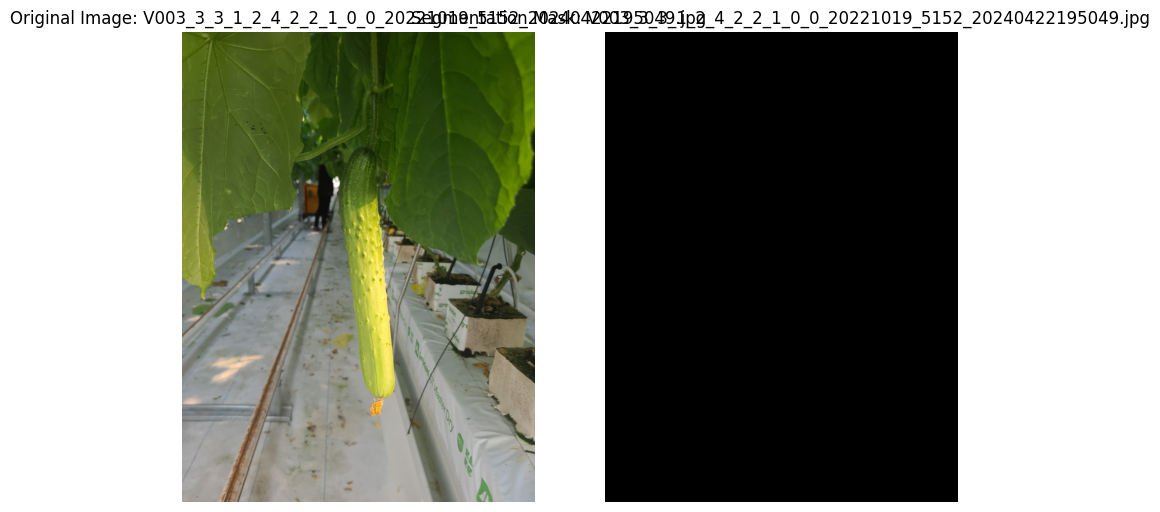

Skipping V003_3_3_1_2_4_2_2_1_0_0_20221019_5292_20240422195057.txt: Odd number of coordinates


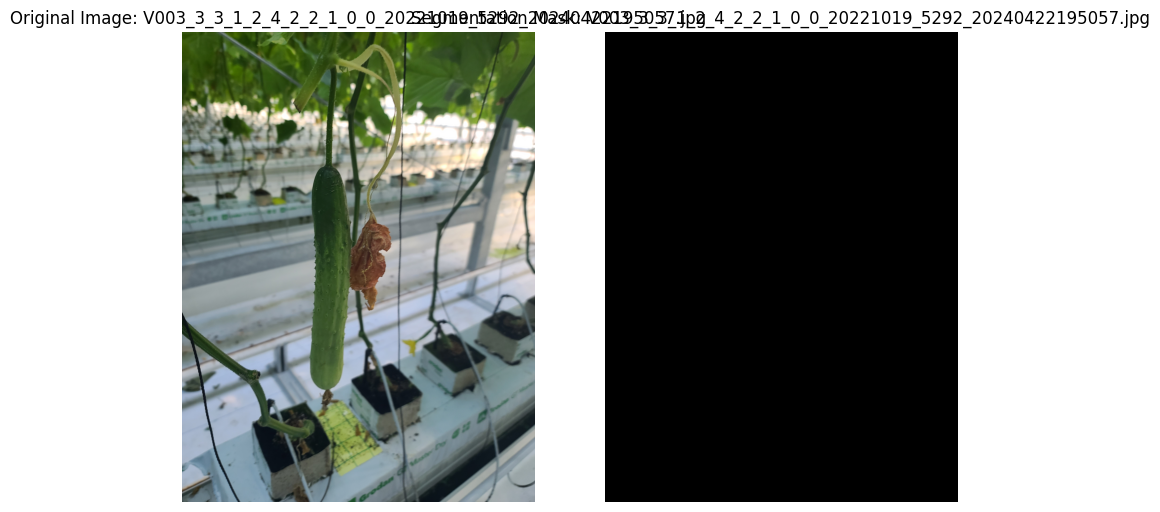

Skipping V003_3_3_1_2_4_2_2_1_0_0_20221019_5317_20240422195058.txt: Odd number of coordinates


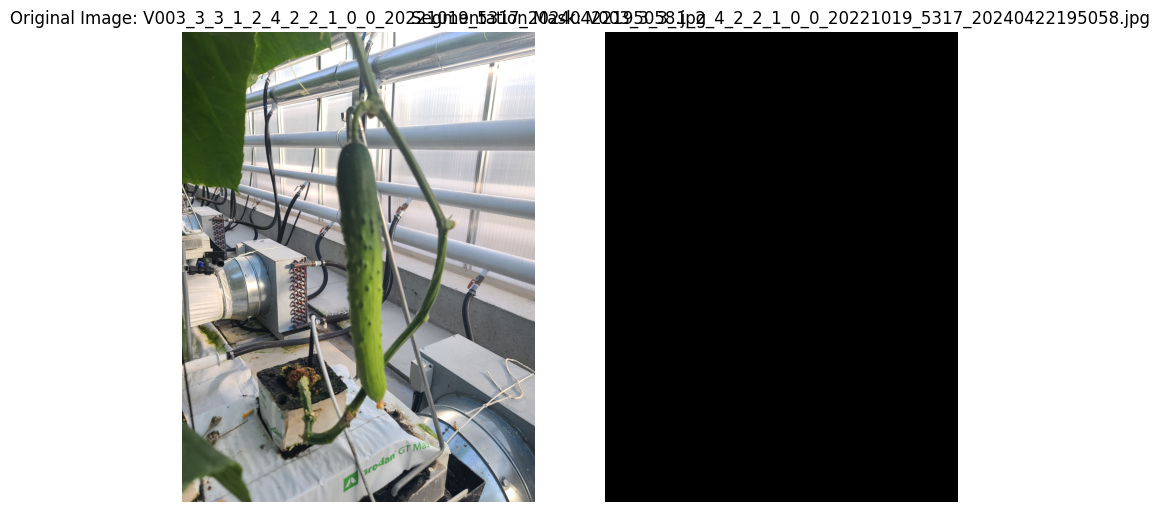

Skipping V003_3_3_1_2_4_2_2_1_0_0_20221019_5200_20240422195052.txt: Odd number of coordinates


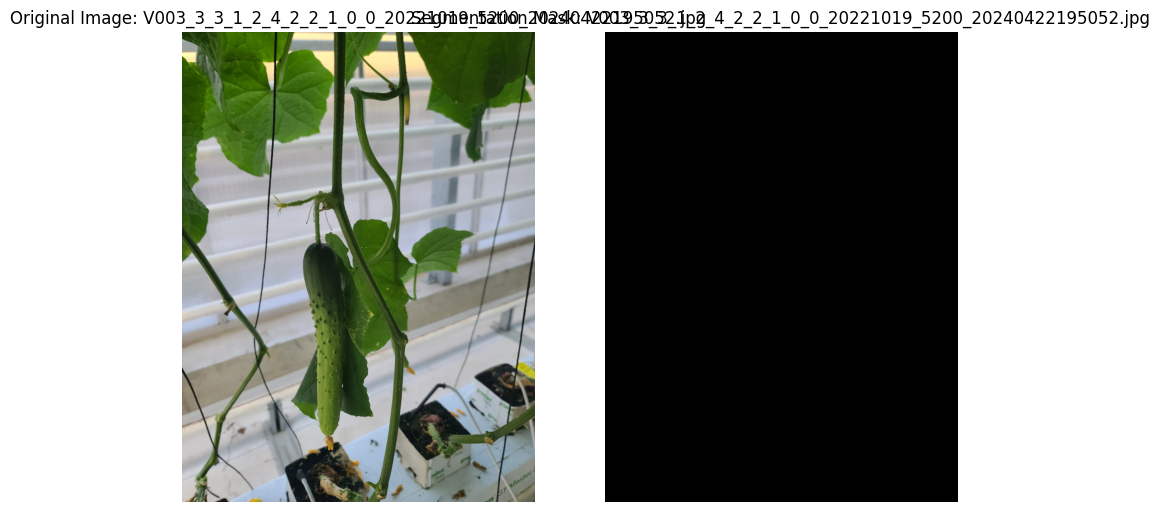

Skipping V003_3_3_1_2_4_2_2_1_0_0_20221019_5131_20240422195048.txt: Odd number of coordinates


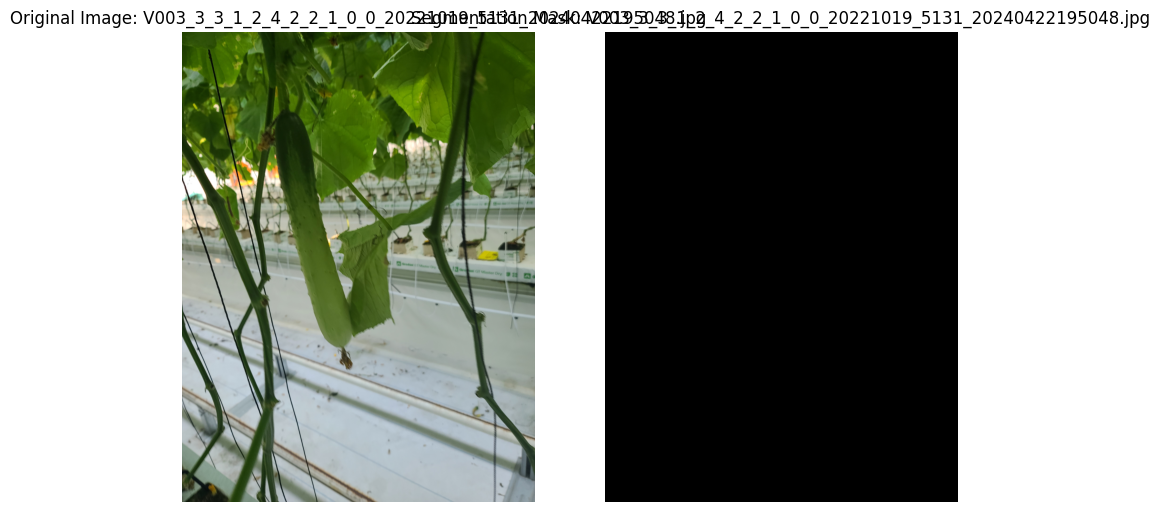

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 경로 설정
image_dir = '/home/knuvi/Desktop/song/cucumber-image/data/oi/images'  # 이미지가 저장된 폴더 경로
label_dir = '/home/knuvi/Desktop/song/cucumber-image/data/oi/images_auto_annotate_labels'  # 레이블 파일(txt)이 저장된 폴더 경로

# 5개의 이미지에 대해 처리
def visualize_segmentation(image_dir, label_dir, max_images=5):
    image_count = 0  # 처리한 이미지 수를 카운트하기 위한 변수

    for image_file in os.listdir(image_dir):
        if image_file.endswith(('.jpg', '.jpeg', '.png')):  # 이미지 파일만 처리
            # 이미지 파일 경로 설정
            image_path = os.path.join(image_dir, image_file)
            
            # 레이블 파일 경로 설정 (이미지 파일명과 동일한 이름으로 매칭)
            label_file = os.path.splitext(image_file)[0] + '.txt'
            label_path = os.path.join(label_dir, label_file)
            
            if os.path.exists(label_path):
                # 이미지 열기
                image = cv2.imread(image_path)
                height, width, _ = image.shape
                
                # 빈 마스크 생성
                mask = np.zeros((height, width), dtype=np.uint8)
                
                # 레이블 파일 열기 (좌표 읽기)
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    for line in lines:
                        coords = list(map(float, line.split()))
                        
                        # 좌표 데이터의 길이가 짝수인지 확인
                        if len(coords) % 2 != 0:
                            print(f"Skipping {label_file}: Odd number of coordinates")
                            continue
                        
                        coords = np.array(coords).reshape(-1, 2)
                        
                        # 좌표를 이미지 크기에 맞게 조정
                        coords[:, 0] = coords[:, 0] * width
                        coords[:, 1] = coords[:, 1] * height
                        coords = coords.astype(np.int32)

                        # 좌표 디버깅: 좌표 범위가 올바른지 확인
                        print(f"Coordinates for {image_file}: {coords}")
                        
                        # Polygon을 사용해 마스크 생성
                        cv2.fillPoly(mask, [coords], color=255)
                
                # 시각화
                plt.figure(figsize=(10, 10))
                
                # 원본 이미지
                plt.subplot(1, 2, 1)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title(f"Original Image: {image_file}")
                plt.axis('off')
                
                # Segmentation Mask
                plt.subplot(1, 2, 2)
                plt.imshow(mask, cmap='gray')
                plt.title(f"Segmentation Mask: {image_file}")
                plt.axis('off')
                
                # 결과 표시
                plt.show()
                
                image_count += 1
                if image_count >= max_images:  # 5개 이미지 처리 후 종료
                    break

# 실행
visualize_segmentation(image_dir, label_dir, max_images=5)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_annotations(image_dir, label_dir, output_dir, num_images=5):
    # 이미지와 레이블 파일 불러오기
    image_files = sorted(os.listdir(image_dir))[:num_images]
    
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        label_file = image_file.replace(".jpg", ".txt")
        label_path = os.path.join(label_dir, label_file)

        # 이미지 로드
        image = cv2.imread(image_path)
        height, width, _ = image.shape

        # 레이블 파일 읽기
        try:
            with open(label_path, 'r') as f:
                lines = f.readlines()

            # 모든 레이블에 대해 반복
            for line in lines:
                line = line.strip().split()
                class_id = int(line[0])
                coords = list(map(float, line[1:]))

                if len(coords) % 2 != 0:
                    print(f"Skipping {label_file}: Odd number of coordinates")
                    continue

                # 상대 좌표를 절대 좌표로 변환
                coords = np.array(coords).reshape(-1, 2)
                coords[:, 0] = coords[:, 0] * width  # x 좌표 변환
                coords[:, 1] = coords[:, 1] * height  # y 좌표 변환

                # 다각형 영역을 그린다 (마스크를 사용)
                coords = coords.astype(np.int32)
                cv2.fillPoly(image, [coords], (0, 255, 0))  # 녹색으로 채움

            # 결과 이미지 저장 및 시각화
            output_image_path = os.path.join(output_dir, f"annotated_{image_file}")
            cv2.imwrite(output_image_path, image)

            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title(f"Annotated: {image_file}")
            plt.show()

        except FileNotFoundError:
            print(f"Label file not found for {image_file}")

# 예시 사용
image_dir = "/home/knuvi/Desktop/song/cucumber-image/data/oi/images"
label_dir = "/home/knuvi/Desktop/song/cucumber-image/data/oi/images_auto_annotate_labels"
output_dir = "/home/knuvi/Desktop/song/cucumber-image/data/oi/seg_output"

visualize_annotations(image_dir, label_dir, output_dir, num_images=5)
